<a href="https://colab.research.google.com/github/Shivi-agwl/697-Capstone-project/blob/for_peer_review/Image_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
##importing required libraries
import numpy as np
import cv2 as cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
## function to resize images with required size
def _resize_image(img,size):
  p_size = img.shape                                     ## initial given size
  max_dim = max(p_size)                                  ##maximum of width/height
  max_index = p_size.index(max_dim)                      ##index of max dimension

##checking if height>width

  if max_index == 0:
    ## height>>width, therefore ajusting height according to width
    width = size/float(p_size[0])
    height = int(float(p_size[1])*float(width))
    required_size = (size,height)
  else:
    ##width>>height, therefore adjusting width according to height
    height = size/float(p_size[1]) 
    width = int(float(p_size[0])*float(height))
    required_size = (width,size)
 ## resizing the image to new dimensions
  new_img = cv2.resize(img,required_size[::-1],interpolation = cv2.INTER_CUBIC)


##padding 
  if max_index == 0:
    ##padding to left and right
    pad_size = size - required_size[1]
    left = int(np.floor(pad_size/2))
    right = int(np.floor(pad_size/2))
    top = int(0)
    bottom = int(0)
  else :
    ##padding to top and bottom
    pad_size = size - required_size[0]
    top = int(np.floor(pad_size/2))
    bottom = int(np.ceil(pad_size/2))
    right = int(0)
    left = int(0)
 ##resultant image with padding 
  result_img = np.pad(new_img,[(top,bottom),(left,right)],"constant",constant_values = 0)
  
  return result_img

In [ ]:
##calling an imaging and transforming it
def _image_read_trasnform(file_path):
  img = cv2.imread(str(file_path))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    ##converting to grayscale
  img = _resize_image(img,256)                   ##calling resize and resizing image to (256,256)
  img1 = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)    ##coverting back to RGB

  ##normalizing the image 
  img1 = (img1 - np.min(img1)) / (np.max(img1) - np.min(img1))        

  return img1  

In [ ]:
##put any image here

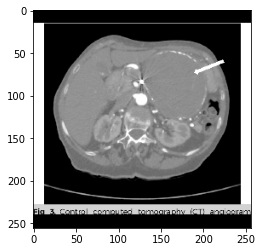

In [ ]:
##calling the transform function in main:
if __name__ == '__main__':
  image = _image_read_trasnform('/content/gdrive/MyDrive/MicrosoftTeams-image.png')
  plt.imshow(image)
  plt.show()